# **Week 11 Class Assignment**
### **0706022310044 - Heidy Mudita Sutedjo**

### **Data Preprocessing**

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [129]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/COVID-19%20Coronavirus%20(2).csv"
df = pd.read_csv(url)
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [130]:
# describe data
df.describe()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


In [131]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


In [132]:
# Dropping 'Other names' column since it is already represented by 'Country'
df.drop(columns=['Other names'], inplace=True)

In [133]:
df = df.rename(columns={
    'Tot\xa0Cases//1M pop': 'Total Cases/1M Population',
    'Tot\xa0Deaths/1M pop': 'Total Deaths/1M Population'
})

The dataset contains **225 entries** (rows) and **9 columns** after dropping the 'Other names' column:
*   **Country, ISO 3166-1 alpha-3 CODE, Continent**: These are categorical (object) columns.
*   **Population, Total Cases, Total Deaths, Tot Cases//1M pop, Tot Deaths/1M pop**: These are numerical columns representing counts or populations (integer type).
*   **Death percentage**: This is a numerical column representing a percentage (float type).

All columns currently have **225 non-null entries**, indicating that there are no missing values in any of the columns after the 'Other names' column was dropped. The dataset is relatively clean in terms of missing values.

In [134]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Country': array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
        'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
        'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
        'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
        'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
        'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei ',
        'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
        'Cameroon', 'Canada', 'CAR', 'Caribbean Netherlands',
        'Cayman Islands', 'Chad', 'Channel Islands', 'Chile', 'China',
        'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
        'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia', 'Denmark',
        'Djibouti', 'Dominica', 'Dominican Republic',
        'Democratic Republic of the Congo', 'Ecuador', 'Egypt',
        'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
        'Eswatini', 'Ethiopia', 'Faeroe I

### **Exploratory Data Analysis (EDA)**

In [135]:
import plotly.express as px

fig = px.choropleth(
    df,
    locations="ISO 3166-1 alpha-3 CODE",
    color="Continent",
    hover_name="Country",
    projection="natural earth",
    title="World Map of Countries by Continent"
)
fig.show()

**World Map of Countries by Continent**: This choropleth map visualizes the geographical distribution of countries, with each country colored according to its continent. It provides a clear, high-level overview of how the countries in the dataset are distributed across the major continents, which can be useful for understanding the global scope of the data.

In [136]:
import plotly.express as px

fig = px.choropleth(
    df,
    locations="ISO 3166-1 alpha-3 CODE",
    color="Death percentage",
    hover_name="Country",
    projection="natural earth",
    title="World Map of Countries by Continent"
)
fig.show()

**World Map of Countries by Death percentage**: This map displays the COVID-19 death percentage for each country. The color intensity on the map indicates the death percentage, allowing for a quick visual assessment of which regions have experienced higher or lower death rates relative to their total cases. This helps in identifying geographical patterns in the pandemic's severity.



### **Encoding and Data Transformation**

In [160]:
# Creating new df for modeling
df_model = df.drop(columns=['ISO 3166-1 alpha-3 CODE', 'Country'])
display(df_model.head())

,Population,Continent,Total Cases,Total Deaths,Total Cases/1M Population,Total Deaths/1M Population,Death percentage
0,0.038789,-0.509986,-0.276449,-0.204571,-0.915487,-0.759994,1.651243
1,-0.231774,0.168989,-0.263220,-0.247798,-0.287081,0.099982,-0.097285
2,0.073154,-1.188960,-0.264347,-0.212815,-0.905275,-0.791845,0.657760
3,-0.251891,0.168989,-0.295431,-0.282336,2.623123,0.736164,-0.611015
4,-0.003016,-1.188960,-0.287281,-0.264265,-0.926078,-0.873149,0.271204


In [138]:
# Nominal Encoding
nominal_cols = ['Continent']
encoder = OrdinalEncoder()
df_model[nominal_cols] = encoder.fit_transform(df_model[nominal_cols])

# Build a mapping dictionary
encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df_model.sample(n = 5)

{'Continent': {'Africa': 0,
               'Asia': 1,
               'Europe': 2,
               'Latin America and the Caribbean': 3,
               'Northern America': 4,
               'Oceania': 5}}


,Population,Continent,Total Cases,Total Deaths,Total Cases/1M Population,Total Deaths/1M Population,Death percentage
134,3370682,1.0,468610,2177,139025,646,0.464565
135,628205,2.0,233326,2705,371417,4306,1.159322
28,444812,1.0,135974,213,305689,479,0.156648
115,38320,2.0,16429,84,428732,2192,0.511291
63,1328097,2.0,558706,2468,420682,1858,0.441735


In [139]:
# Select the features to scale
features_to_scale = ['Population', 'Continent', 'Total Cases', 'Total Deaths','Total Cases/1M Population', 'Total Deaths/1M Population', 'Death percentage']
df_to_scale = df_model[features_to_scale]

# Initialize the StandardScaler
sc = StandardScaler()

# Fit the scaler to the data and transform the data
df_model = pd.DataFrame(sc.fit_transform(df_to_scale), columns=features_to_scale)

df_model.head()

,Population,Continent,Total Cases,Total Deaths,Total Cases/1M Population,Total Deaths/1M Population,Death percentage
0,0.038789,-0.509986,-0.276449,-0.204571,-0.915487,-0.759994,1.651243
1,-0.231774,0.168989,-0.263220,-0.247798,-0.287081,0.099982,-0.097285
2,0.073154,-1.188960,-0.264347,-0.212815,-0.905275,-0.791845,0.657760
3,-0.251891,0.168989,-0.295431,-0.282336,2.623123,0.736164,-0.611015
4,-0.003016,-1.188960,-0.287281,-0.264265,-0.926078,-0.873149,0.271204


### **K-Means**

In [140]:
from sklearn.cluster import KMeans

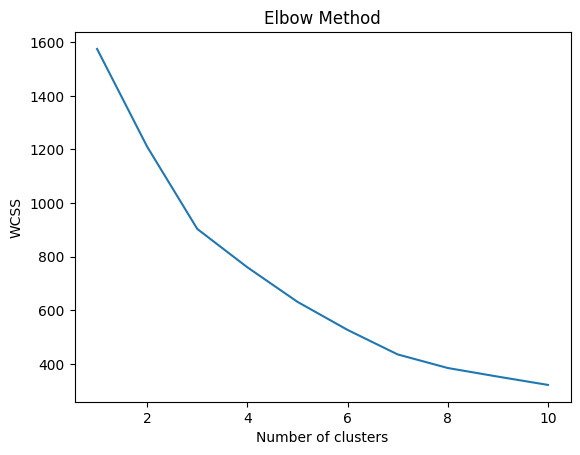

In [141]:
wcss = []
for i in range(1, 11):   #clusters 2-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_model)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [142]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters         WCSS
0                   1  1575.000000
1                   2  1210.100224
2                   3   903.368760
3                   4   760.253990
4                   5   631.357420
5                   6   526.617579
6                   7   435.183289
7                   8   384.513204
8                   9   352.348665
9                  10   321.407166


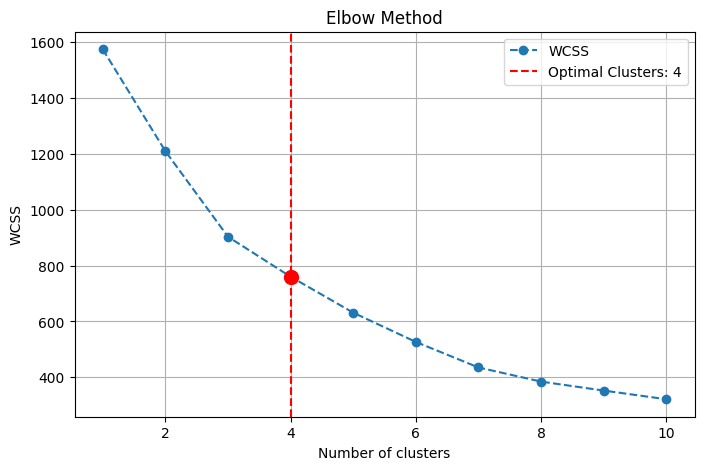

The optimal number of clusters is: 4


In [143]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

**Conclusion on Optimal Number of Clusters (K)**

In the elbow method plot generated, we can visually observe a bend or "elbow" in the curve. The `KneeLocator` algorithm automatically identified this elbow point at **4**. This suggests that clustering the data into 4 groups provides a good balance between minimizing the within-cluster variation and the number of clusters. Therefore, based on the elbow method, the optimal number of clusters (K) to use for K-Means clustering on this dataset is **4**.

In [144]:
# Modeling
# Fit K-Means to the data with the optimal number of K cluster = 4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_model)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

,Country,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Total Cases/1M Population,Total Deaths/1M Population,Death percentage,KMeans_Cluster
0,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743,0
1,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058,1
2,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216,0
3,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271,1
4,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438,0


### **Hierarchical Agglomerative Clustering**

In [145]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            # Use only the scaled numerical columns for clustering
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_model)
            silhouette_avg = silhouette_score(df_model, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

Skipping Ward linkage with Manhattan metric (not supported).
Best Silhouette Score: 0.8055712111257188
Optimal Number of Clusters: 2
Optimal Linkage Method: average
Optimal Metric: manhattan


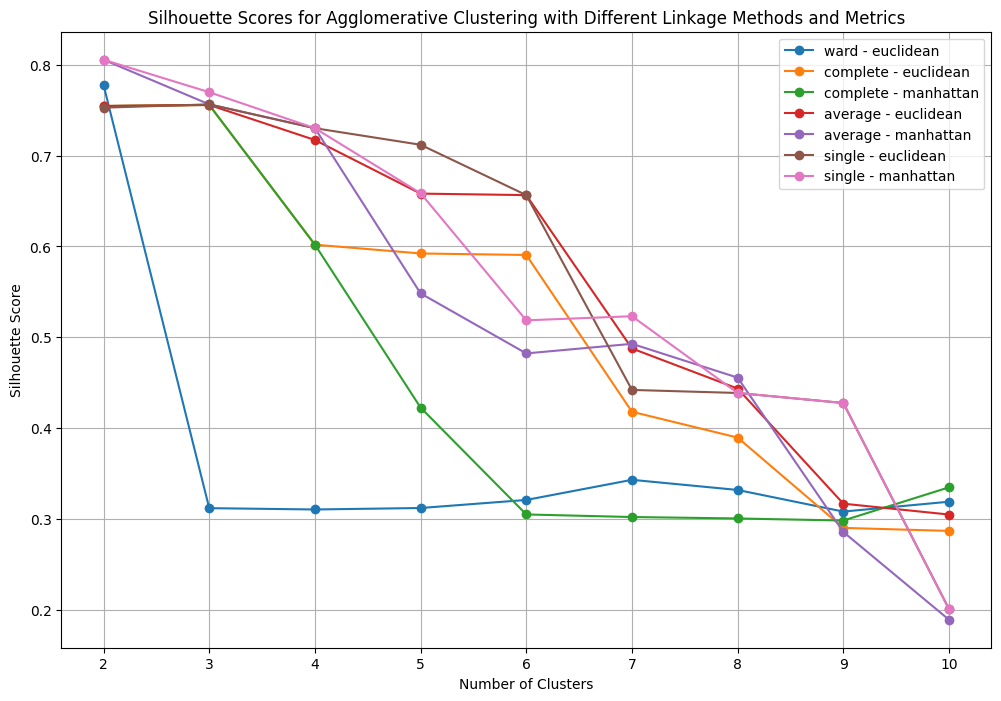

Best Silhouette Score: 0.8055712111257188
Optimal Number of Clusters: 2
Optimal Linkage Method: average
Optimal Metric: manhattan


In [146]:
# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

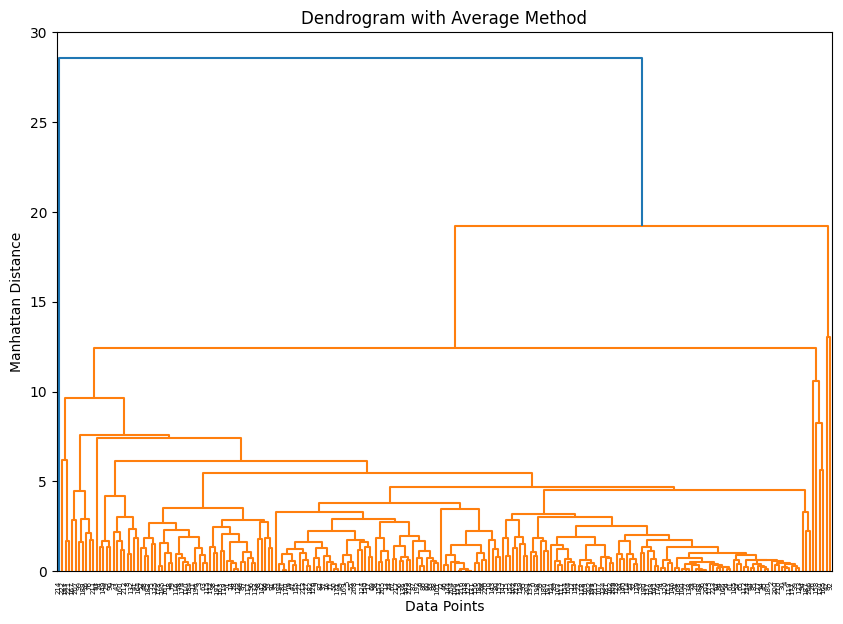

In [147]:
# Average Distance
linked = linkage(df_model, method='average', metric='cityblock')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Average Method")
plt.xlabel("Data Points")
plt.ylabel("Manhattan Distance")
plt.show()

In [148]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df_model)

In [150]:
# Add the cluster labels to the original data
df['Agglo'] = y_hc

# Analyze the clusters with the original values
df.head()

,Country,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Total Cases/1M Population,Total Deaths/1M Population,Death percentage,KMeans_Cluster,Agglo
0,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743,0,0
1,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058,1,0
2,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216,0,0
3,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271,1,0
4,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438,0,0


### **Model Evaluation, Comparison, Cluster Profiling & Insights**

### Silhouette Score

In [149]:
# Evaluation for Hierarchical Clustering
ss_hierarchical = silhouette_score(df_model, y_hc)
print(f"Hierarchical Clustering Silhouette Score: {ss_hierarchical}")

# Evaluation for K-Means Clustering
kmeans_clusters = df['KMeans_Cluster']
ss_kmeans = silhouette_score(df_model, kmeans_clusters)
print(f"K-Means Clustering Silhouette Score: {ss_kmeans}")

Hierarchical Clustering Silhouette Score: 0.8055712111257188
K-Means Clustering Silhouette Score: 0.3238647925070002


### Cluster Summary

In [154]:
# Data summary for 'Hierarchical Cluster'
cluster_summary_agglo = df.groupby(y_hc).agg({
    'Population': ['mean', 'median'],
    'Continent': ['first', 'count'],
    'Total Cases': ['mean', 'median'],
    'Total Deaths': ['mean', 'median'],
    'Total Cases/1M Population': ['mean', 'median'],
    'Total Deaths/1M Population': ['mean', 'median'],
    'Death percentage': ['mean', 'median'],
    'KMeans_Cluster': ['first', 'count']
})

# Rename the <lambda> column in the Gender MultiIndex level
cluster_summary_agglo = cluster_summary_agglo.rename(columns={'first': 'mode'}, level=1)

cluster_summary_agglo = cluster_summary_agglo.rename_axis('cluster')

print("Hierarchical Clustering Summary:")
display(cluster_summary_agglo)

# Data summary for 'KMeans_Cluster'
cluster_summary_kmeans = df.groupby(df['KMeans_Cluster']).agg({
    'Population': ['mean', 'median'],
    'Continent': ['first', 'count'],
    'Total Cases': ['mean', 'median'],
    'Total Deaths': ['mean', 'median'],
    'Total Cases/1M Population': ['mean', 'median'],
    'Total Deaths/1M Population': ['mean', 'median'],
    'Death percentage': ['mean', 'median'],
    'Agglo': ['first', 'count']
})

# Rename the <lambda> column in the Gender MultiIndex level
cluster_summary_kmeans = cluster_summary_kmeans.rename(columns={'first': 'mode'}, level=1)

cluster_summary_kmeans = cluster_summary_kmeans.rename_axis('cluster')

print("\nK-Means Clustering Summary:")
display(cluster_summary_kmeans)

Hierarchical Clustering Summary:


Population                      Continent         Total Cases  \
                 mean       median              mode count          mean   
cluster                                                                    
0        3.373692e+07    5791800.0              Asia   224  1.829182e+06   
1        3.344006e+08  334400597.0  Northern America     1  8.183905e+07   

                     Total Deaths            Total Cases/1M Population  \
             median          mean     median                      mean   
cluster                                                                  
0          162753.0  2.306967e+04     1946.0             136418.973214   
1        81839052.0  1.008222e+06  1008222.0             244734.000000   

                  Total Deaths/1M Population         Death percentage  \
           median                       mean  median             mean   
cluster                                                                 
0         88662.0                1088.151786   683.0         1.445072   
1        244734.0                3015.000000  3015.0         1.231957   

                  KMeans_Cluster        
           median           mode count  
cluster                                 
0        1.027844              0   224  
1        1.231957              3     1


K-Means Clustering Summary:


Population                                      Continent        \
                 mean        median                             mode count   
cluster                                                                      
0        3.131194e+07  1.351388e+07                             Asia    99   
1        1.146644e+07  1.827346e+06                           Europe   122   
2        1.421539e+09  1.421539e+09                             Asia     2   
3        2.748025e+08  2.748025e+08  Latin America and the Caribbean     2   

          Total Cases               Total Deaths            \
                 mean      median           mean    median   
cluster                                                      
0        7.173392e+05     99194.0    9730.303030    1637.0   
1        2.176529e+06    321807.5   24737.803279    2493.0   
2        2.159189e+07  21591891.0  263013.000000  263013.0   
3        5.591943e+07  55919434.0  834245.500000  834245.5   

        Total Cases/1M Population           Total Deaths/1M Population  \
                             mean    median                       mean   
cluster                                                                  
0                    31340.353535   10719.0                 323.484848   
1                   223647.483607  202155.5                1707.204918   
2                    15380.500000   15380.5                 187.000000   
3                   192067.500000  192067.5                3041.500000   

                Death percentage           Agglo        
         median             mean    median  mode count  
cluster                                                 
0         144.0         1.908639  1.279353     0    99  
1        1573.5         1.051893  0.750551     0   122  
2         187.0         2.104518  2.104518     0     2  
3        3041.5         1.716434  1.716434     0     2

### Cluster Visualization

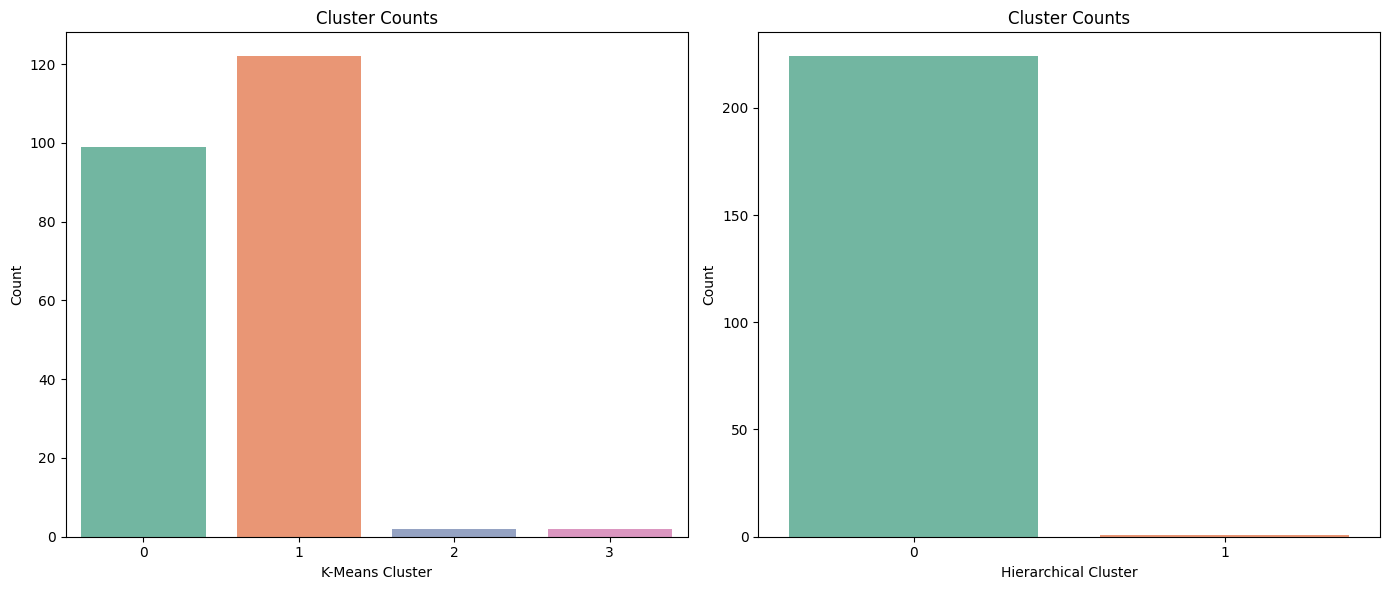

In [156]:
plt.figure(figsize=(14, 6))

# K-Means Clusters
plt.subplot(1, 2, 1)
sns.countplot(
    x='KMeans_Cluster',
    hue='KMeans_Cluster',
    data=df,
    palette='Set2',
    legend=False
)
plt.title('Cluster Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Count')

# Hierarchical Clusters
plt.subplot(1, 2, 2)
sns.countplot(
    x='Agglo',
    hue='Agglo',
    data=df,
    palette='Set2',
    legend=False
)
plt.title('Cluster Counts')
plt.xlabel('Hierarchical Cluster')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [157]:
import plotly.express as px

fig = px.choropleth(
    df,
    locations="ISO 3166-1 alpha-3 CODE",
    color="KMeans_Cluster",  # Color by K-Means Cluster for better readability
    hover_name="Country",
    projection="natural earth",
    title="World Map of Countries by K-Means Cluster"
)

fig.show()

In [158]:
import plotly.express as px

fig = px.choropleth(
    df,
    locations="ISO 3166-1 alpha-3 CODE",
    color="Agglo",  # Color by Hierarchical Cluster for better readability
    hover_name="Country",
    projection="natural earth",
    title="World Map of Countries by Hierarchical Cluster"
)

fig.show()

### Cluster Profiling

**Hierarchical Agglomerative Clustering (2 Clusters):**

**Cluster 0 (Agglo):**

**Characteristics**: This cluster contains the vast majority of countries (224 countries). It is characterized by lower average population (mean ~33.7 million), lower total cases (mean ~1.8 million), and lower total deaths (mean ~23,069) compared to Cluster 1. The 'Continent' mode for this cluster is 'Asia'. Their 'Death percentage' mean is around 1.44%.

**Interpretation**: This segment represents a broad group of countries, predominantly Asian, with relatively moderate to low COVID-19 impact and population sizes. These are likely diverse countries that did not experience the extreme numbers seen in the outlier cluster.

**Count**: This cluster has 224 countries.

**Cluster 1 (Agglo):**

**Characteristics**: This cluster contains only one country. It stands out with a significantly higher mean and median population (334.4 million), total cases (81.8 million), and total deaths (~1.0 million). The 'Continent' mode for this cluster is 'Northern America'. Its 'Death percentage' mean is around 1.23%.

**Interpretation**: This cluster identifies a single, very large country (likely the USA given the 'Northern America' continent and high numbers) that experienced a substantially higher number of COVID-19 cases and deaths compared to almost all other countries in the dataset. This suggests it's an outlier in terms of total impact.

**Count**: This cluster has 1 country.

**K-Means Clustering (4 Clusters):**

**Cluster 0 (KMeans):**

Characteristics: This cluster includes 99 countries. It's predominantly associated with 'Asia' and shows relatively lower mean population (31.3 million), total cases (717,339), and total deaths (~9,730). The mean 'Death percentage' is around 1.91%.

**Interpretation**: This segment largely represents Asian countries with a generally lower absolute impact from COVID-19. They might be smaller nations or those that managed to contain the spread more effectively.

**Count**: This cluster has 99 countries.

**Cluster 1 (KMeans):**

**Characteristics**: This is the largest cluster with 122 countries, primarily from 'Europe'. Countries in this cluster have moderate mean population (11.4 million), total cases (2.1 million), and total deaths (~24,737). The mean 'Death percentage' is around 1.05%.

**Interpretation**: This segment appears to be composed mainly of European nations, showing a mid-range impact from COVID-19. Their 'Total Cases/1M Population' and 'Total Deaths/1M Population' are relatively higher than Cluster 0, indicating a significant per capita impact despite moderate absolute numbers.

**Count**: This cluster has 122 countries.

**Cluster 2 (KMeans):**

**Characteristics**: This cluster contains only 2 countries, both from 'Asia'. They are characterized by extremely high mean population (1.42 billion), very high total cases (21.5 million), and total deaths (~263,013). The mean 'Death percentage' is around 2.10%.

**Interpretation**: This segment likely represents the two most populous Asian countries, which, due to their sheer size, have experienced very large absolute numbers of COVID-19 cases and deaths, even if their per-capita rates might vary.

**Count**: This cluster has 2 countries.

**Cluster 3 (KMeans):**

**Characteristics**: This cluster also contains 2 countries, identified as 'Latin America and the Caribbean'. These countries show very high total cases (55.9 million) and total deaths (834,245) with a mean population of around 274.8 million. The mean 'Death percentage' is around 1.72%.

**Interpretation**: This cluster highlights a small group of countries from Latin America and the Caribbean that have faced a severe COVID-19 impact, characterized by high absolute numbers of cases and deaths, and also a high per-capita death rate (high 'Total Deaths/1M Population').

**Count**: This cluster has 2 countries.

### Government Policy Recommendations

**Hierarchical Agglomerative Clustering**

**Cluster 0 (224 Countries – Mostly Asia, moderate impact)**

**Insights**:
Large group of countries with relatively moderate numbers in total cases and deaths, and generally lower population size.

**Policy Recommendations:**

* Governments should strengthen ongoing public health surveillance to prevent sudden case surges, especially in lower-resource settings.

* Countries should invest in preventive healthcare, such as vaccination and public awareness, to maintain stable transmission control.

* Since many countries here may not face extreme pressure on medical systems, governments should focus on improving healthcare readiness capacity, including hospital beds and ICU availability, without large emergency expansions.

* Some may still face data completeness issues, so enhancing national reporting systems would help improve international decision-making.

**Cluster 1 (1 Country – USA-level outlier, extremely high cases and deaths)**

**Insights**:
One country stands dramatically apart with the highest total population and absolute case/death counts.

**Policy Recommendations:**

* The government should prioritize strengthening nationwide outbreak early-warning systems, as high population and global connectivity create vulnerability to fast spread.

* Mass-scale public health education and vaccination campaigns remain crucial to reduce future death and case spikes.

* Investment in hospital surge capacity, especially in ICU and emergency staffing, is necessary to prevent healthcare overload in future crises.

* Given its global role and strong economic influence, the country should share best practices, technology, and support to lower-resourced nations.

**K-Means Clustering**

**Cluster 0 (99 Countries – Mostly Asia, low absolute impact)**

**Insights**:
Lower total cases and deaths, representing countries that managed to keep infections limited.

**Policy Recommendations:**

* Governments should continue maintaining border controls, contact tracing, and early intervention policies to sustain low case numbers.

* Since low cases could also reflect underreporting, investment in testing and digital case reporting infrastructure is recommended.

* Continued investment in public health education and vaccination uptake will help prevent future outbreaks.

**Cluster 1 (122 Countries – Mostly Europe, moderate impact and higher per-capita burden)**

**Insights**:
Moderate absolute cases and deaths but noticeably higher per-capita infection and fatality rates.

**Policy Recommendations:**

* These countries should increase focus on protecting vulnerable groups, such as the elderly, since Europe has older demographic structures.

* Governments must ensure consistent vaccine booster programs to minimize severe outcomes.

* Medical systems may already be strained, so healthcare worker recruitment, training, and burnout mitigation policies should be prioritized.

* Encourage countries to implement digital disease monitoring systems for faster response during outbreaks.

**Cluster 2 (2 Countries – Extremely high population Asian nations)**

**Insights**:
Very large case and death counts driven by massive population size.

**Policy Recommendations:**

* High-population countries should expand decentralized healthcare capacity, ensuring rural and urban regions receive equal medical access.

* Scaling community-level telemedicine, rapid testing centers, and mobile vaccination units can reduce pressure on major city hospitals.

* Governments must enhance large-scale logistics and supply chain management to ensure PPE, oxygen, and medicines stay available during peak waves.

* Public health messaging should be localized and translated to multiple languages to reach diverse populations.

**Cluster 3 (2 Latin American/Caribbean Countries – extremely high impact and high per-capita deaths)**

**Insights**:
Severe burden, high deaths per million, and major pressure on healthcare systems.

**Policy Recommendations:**

* These countries should invest heavily in pandemic preparedness, particularly in increasing ICU capacity, oxygen availability, and infectious disease hospitals.

* Since high deaths suggest fragile healthcare systems, they may need international medical assistance, funding, or partnerships to reinforce capacity.

* Public campaigns that target high-risk behaviors (indoor gatherings, limited masking) can reduce future transmission.

* Governments should improve vaccination accessibility in remote and low-income areas, addressing inequality in medical access

### Best Model

Hierarchical Clustering achieved a much higher Silhouette Score (0.8056) than K-Means (0.3239), making it the better model in terms of cluster separation and compactness. However, it produced only 2 clusters, one large group and one single outlier. Giving limited practical insight.

K-Means, despite a lower Silhouette Score, generated 4 more meaningful clusters that allowed clearer differentiation between country groups. Hierarchical Clustering is mathematically stronger, but K-Means is more useful for practical interpretation and policy recommendations, which I think is the actual purpose of data mining.

**Therefore, K-Means is the best model to apply in this dataset.**